In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (4,3)  # good default size for column-width figure

In [113]:
# NOTE before you import from excel, go in and delete column F from the sheet
folder = 'data/feb28/'
filenames = ['15491_water_tau01.csv', '15541_water_tau02.csv', '16011_water_tau03.csv', '16071_water_tau05.csv', '16131_water_tau07.csv', '16181_water_tau09.csv', '16231_water_tau11.csv', '16271_water_tau13.csv', '16321_water_tau15.csv', '16391_water_tau17.csv', '16431_water_tau19.csv', '16471_water_tau21.csv']
files = [folder + name for name in filenames]
tau = np.array([1, 2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]) * 1E-3

sets = []  # creates list of datasets

for path in files:
    df = pd.read_csv(path, header=None)
    df.columns = ['Header', 'Headerdata', 'n1', 't', 'V']
    df = df.drop(columns=['n1'])
    sets.append(df)

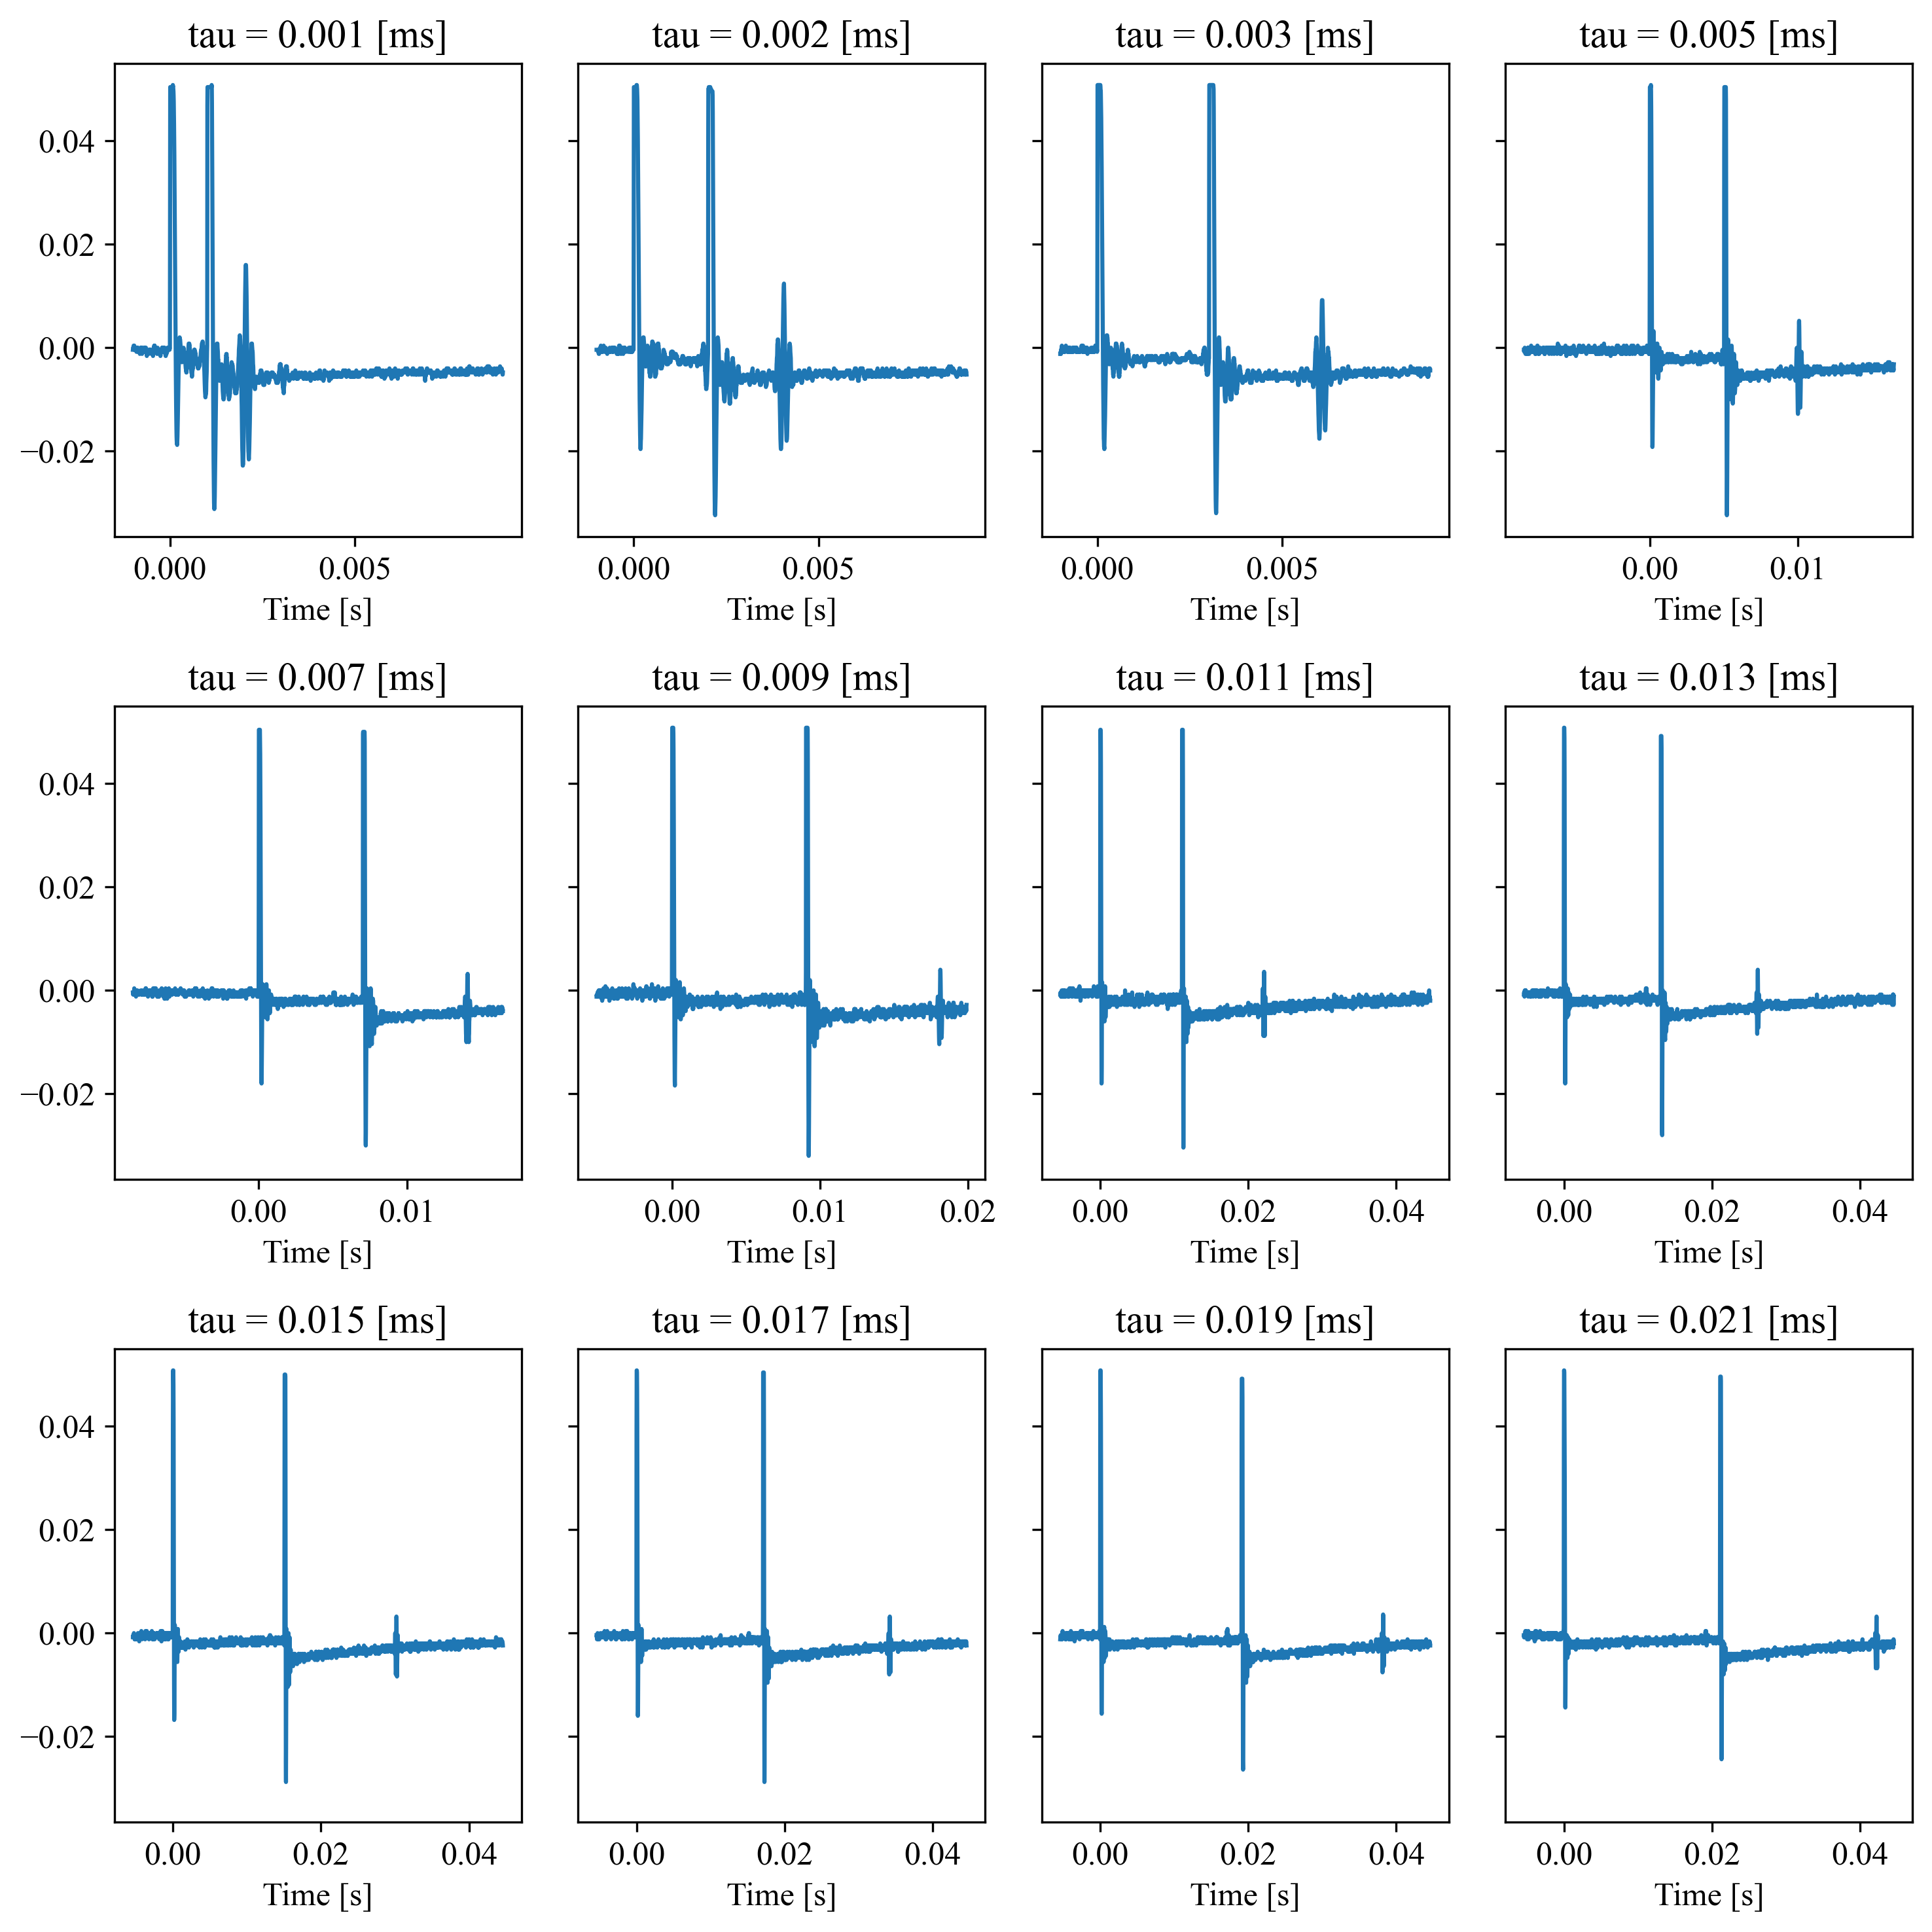

In [124]:
fig, ax = plt.subplots(3, 4, figsize=(10, 10), tight_layout=True, sharey=True)
maxvals = []

for i, ax in enumerate(ax.flat):
    data = sets[i]
    times = data['t'].to_numpy()
    volts = data['V'].to_numpy()
    taui = tau[i]
    
    lower_val = 2 * taui - 0.5 * taui
    upper_val = 2 * taui + 0.5 * taui
    
    lower_idx = (np.abs(times - lower_val)).argmin()
    upper_idx = (np.abs(times - upper_val)).argmin()

    y = volts[lower_idx:upper_idx]
    amax = np.amax(y)
    maxvals.append(amax)
    
    ax.plot(times, volts)
    ax.set_xlabel("Time [s]")
    ax.set_title(f"tau = {taui:.3f} [ms]")

Text(0, 0.5, 'Amplitude [V]')

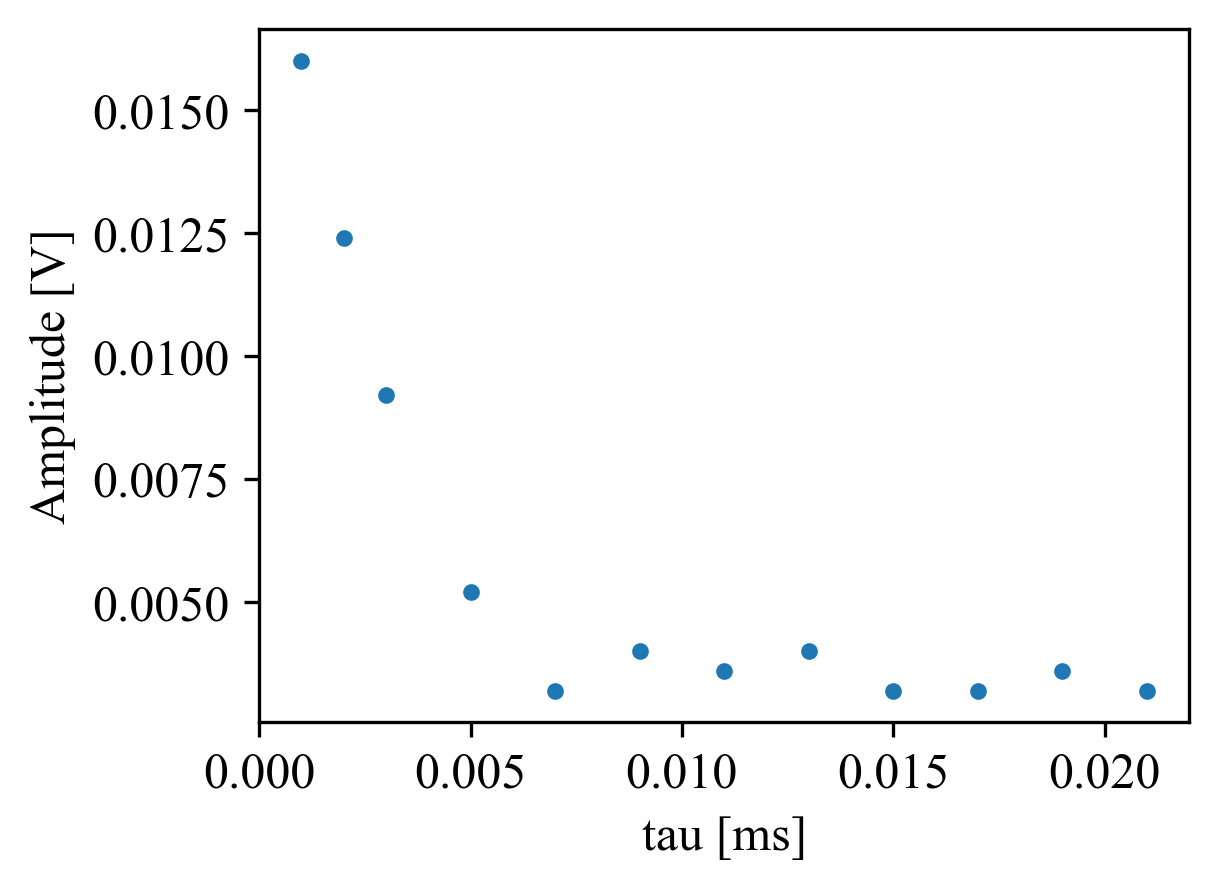

In [125]:
plt.plot(tau, maxvals, '.')
plt.xlabel('tau [ms]')
plt.ylabel('Amplitude [V]')